# DIC LAB 2 Problem 3 : Extract and Repurpose Data : GAMING,JOBS AND BROADBAND

Define all the libraries which needs to be set for operations here

In [ ]:
library("XML")
library("methods")
library("dplyr")
library("tidyr")
library("ggplot2")

Read the data from csv file

In [224]:
totalData <- read.csv(file="June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv", header=TRUE, sep=",")

Print the name of all the columns in data 

In [225]:
colnames(totalData)

[1] "psraid"     "sample"     "int_date"   "lang"       "usr"       
  [6] "cregion"    "state"      "form"       "sex"        "q1"        
 [11] "q3"         "eminuse"    "intmob"     "intfreq"    "home4nw"   
 [16] "bbhome1"    "bbhome2"    "bbhome3a"   "bbhome3b"   "bbhome3c"  
 [21] "bbhome3d"   "bbhome3e"   "device1a"   "smart1"     "q4"        
 [26] "bbsmart1"   "bbsmart2"   "bbsmart3a"  "bbsmart3b"  "bbsmart3c" 
 [31] "bbsmart3d"  "bbsmart3e"  "bbsmart3f"  "bbsmart4"   "cable1"    
 [36] "cable2"     "cable3a"    "cable3b"    "cable3c"    "act19"     
 [41] "act87a"     "act87b"     "act137"     "q5a"        "q5b"       
 [46] "q5c"        "q5d"        "q5e"        "q5f"        "date1a"    
 [51] "date2a"     "date3a"     "date3b"     "date4a"     "date4b"    
 [56] "date4c"     "date4d"     "date4e"     "date4f"     "game1"     
 [61] "game2a"     "game2b"     "game2c"     "game2d"     "game2e"    
 [66] "game2f"     "game3a"     "game3b"     "game4"      "emplnw"    
 [71] "emptype1"   "emptype2"   "emptype3"   "stud"       "job1a"     
 [76] "job1b"      "job1c"      "job1d"      "job1e"      "job1f"     
 [81] "job2"       "job3a"      "job3b"      "job3c"      "job3d"     
 [86] "job3e"      "job3f"      "job3g"      "job3h"      "job4"      
 [91] "smjob1"     "smjob2a"    "smjob2b"    "smjob2c"    "smjob2d"   
 [96] "smjob2e"    "smjob3"     "smjob4a"    "smjob4b"    "smjob4c"   
[101] "smjob4d"    "smjob4e"    "snsjob1a"   "snsjob1b"   "snsjob1c"  
[106] "snsjob2a"   "snsjob2b"   "job5a"      "job5b"      "job5c"     
[111] "job5d"      "auto1a"     "auto1b"     "auto1c"     "auto1d"    
[116] "auto1e"     "auto2"      "auto3"      "age"        "marital"   
[121] "hh1"        "par"        "kidage1"    "kidage2"    "kidage3"   
[126] "educ2"      "edinst"     "disa"       "party"      "partyln"   
[131] "ideo"       "hisp"       "birth_hisp" "race"       "inc"       
[136] "ql1a"       "qc1"        "zipcode"    "weight"     "standwt"

# QNS 1) What is the impact of Education on type of Labour people do ? And is there any gender bias ?

Check the data for gender if it needed any cleaning 

In [262]:
totalData %>% group_by(sex) %>% summarize(count = n())

sex,count
1,989
2,1012


Check the data for Education level if it needed any cleaning 

In [226]:
totalData %>% group_by(educ2) %>% summarize(count = n())

educ2,count
1,66
2,86
3,483
4,340
5,183
6,410
7,36
8,377
98,5
99,15


Check the data for employment if it needed any cleaning 

In [227]:
totalData %>% group_by(emptype2) %>% summarize(count = n())

emptype2,count
1,446
2,652
8,2
NA,901


Based on the above data add filters and change the columns values to string values as needed

In [228]:
data1 = totalData %>% filter(educ2 < 10) %>%
    filter(emptype2 < 8) %>%
    within(sex <- factor(sex, levels = c(1,2), labels = c("Male", "Female"))) %>%
    within(educ2 <- factor(educ2, levels = c(1,2,3,4,5,6,7,8), labels = c("A","B","C","D","E","F","G","H"))) %>% 
    within(Manual_Labour <- factor(emptype2, levels = c(1,2), labels = c("Yes", "No")))

Define xlabel for graph

In [229]:
xLabel1 = "Education Level \n\n (A : Less than high school (Grades 1-8 or no formal schooling)
B : High school incomplete (Grades 9-11 or Grade 12 with NO diploma)
C : High school graduate (Grade 12 with diploma or GED certificate)
D : Some college, no degree (includes some community college)
E : Two year associate degree from a college or university
F : Four year college or university degree/Bachelor’s degree (e.g., BS, BA, AB)
G : Some postgraduate or professional schooling, no postgraduate degree
H : Postgraduate or professional degree, including master’s, \ndoctorate, medical or law degree (e.g., MA, MS, PhD, MD, JD))"

Define y label for graph

In [230]:
yLabel1 = "Number of People"

Define the title of the graph

In [231]:
title1 = "A Comparative Study of Education Level with Labour Type \nwithin Different Gender"

Plot the graph 

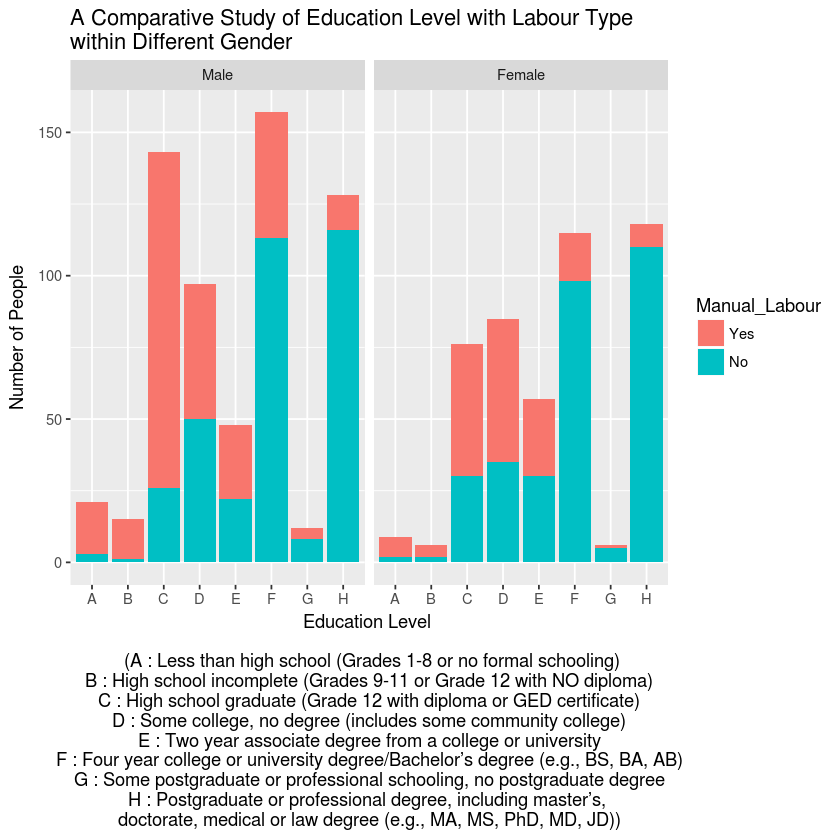

In [232]:
qplot(educ2, data = data1, geom = "bar", facets = .~ sex, fill = Manual_Labour, xlab = xLabel1, ylab = yLabel1, main = title1)

# HYPOTHESIS 1

**As the education level increase the number of people who do manual labour decreases without gender bias**

# Qns 2) Do having a SmartPhone makes one aware of the jobs on social networking sites more ?

Check the data for people who uses Social media for job if it needed any cleaning 

In [233]:
totalData %>% group_by(snsjob1a) %>% summarize(count = n())

snsjob1a,count
1,399
2,823
9,1
NA,778


Check the data for income if it needed any cleaning 

In [234]:
totalData %>% group_by(inc) %>% summarize(count = n())

inc,count
1,157
2,187
3,180
4,165
5,164
6,275
7,208
8,197
9,163
98,117


Check the data for people who uses smartphone on job seaching if it needed any cleaning 

In [235]:
totalData %>% group_by(smjob1) %>% summarize(count = n())

smjob1,count
1,487
2,840
NA,674


Add the filters and change the data values from numeric to string for readibility

In [269]:
data2 = totalData %>% filter(inc < 10)  %>%
    filter(snsjob1a < 9) %>%
    filter(smjob1 < 9) %>%
    within(smjob1 <- factor(smjob1, levels = c(1,2), labels = c("Yes Uses SmartPhones","No dont use SmartPhones"))) %>%
    within(inc <- factor(inc, levels = c(1,2,3,4,5,6,7,8,9), labels = c("A","B","C","D","E","F","G","H","I"))) %>% 
    within(SNS_FOR_JOB <- factor(snsjob1a, levels = c(1,2), labels = c("Yes", "No")))

Define X axis label

In [ ]:
xLabel2 = "Income range \n\n (A : Less than $10,000
B : 10 to under $20,000
C : 20 to under $30,000
C : 30 to under $40,000
D : 40 to under $50,000
E : 50 to under $75,000
F : 75 to under $100,000
G : 100 to under $150,000
H : $150,000 or more)"

Define the Y axis label

In [282]:
yLabel2 = "Number of People"

Define the title of the graph

In [318]:
title2 = "A Comparative Study of Social media usage over SmartPhones \nfor job searches within Different Income range"

Plot the graph

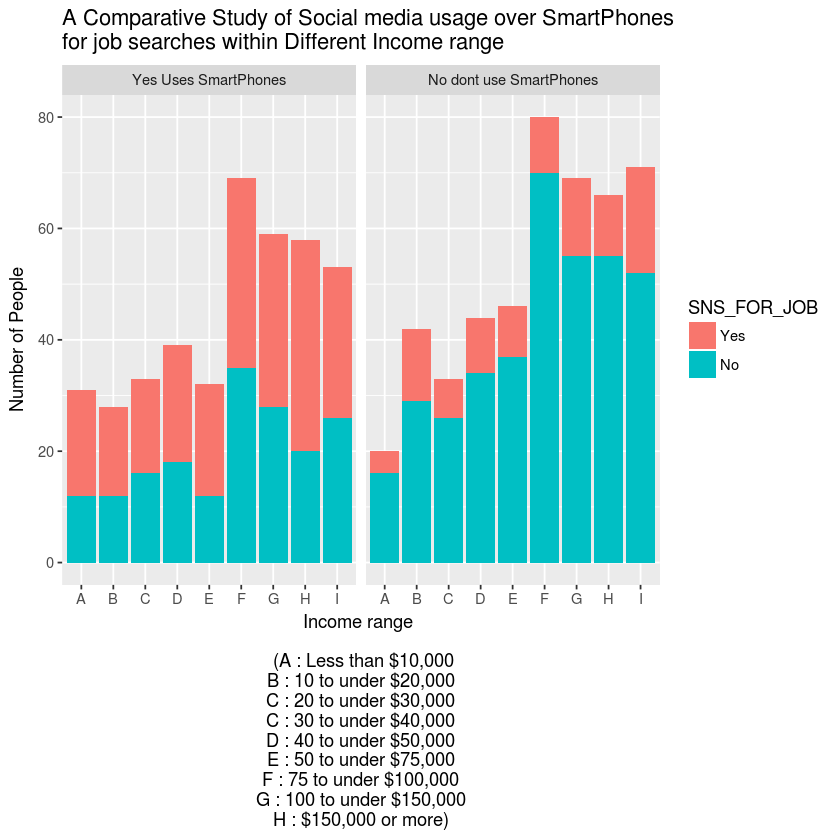

In [319]:
qplot(inc, data = data2, geom = "bar", facets = .~ smjob1, fill = SNS_FOR_JOB, xlab = xLabel2, ylab = yLabel2, main = title2)

# HYPOTHESIS 2

**People who uses smartphones tend to be more aware of the more social media jobs irrespective of the income range**

# Qns 3) Are Educated people more aware of the effects of gaming ?

Check the data for education level if it needed any cleaning 

In [280]:
totalData %>% group_by(educ2) %>% summarize(count = n())

educ2,count
1,66
2,86
3,483
4,340
5,183
6,410
7,36
8,377
98,5
99,15


Check the data for people who think video games are violent if it needed any cleaning 

In [242]:
totalData %>% group_by(game1) %>% summarize(count = n())

game1,count
1,925
2,1071
8,2
9,3


Check the data for people who plays games if it needed any cleaning 

In [243]:
totalData %>% group_by(game3b) %>% summarize(count = n())

game3b,count
1,829
2,993
8,168
9,11


Add filters and appropiate naming to the data

In [291]:
data3 = totalData %>% filter(educ2 < 10)  %>%
    filter(game3b < 8) %>%
    filter(game1 < 8) %>%
    within(game1 <- factor(game1, levels = c(1,2), labels = c("Playes Video Games","Don't play Video Games"))) %>%
    within(educ2 <- factor(educ2, levels = c(1,2,3,4,5,6,7,8), labels = c("A","B","C","D","E","F","G","H"))) %>% 
    within(GAMES_ARE_VIOLENT <- factor(game3b, levels = c(1,2), labels = c("Yes", "No")))

Define X axis abel

In [292]:
xLabel3 = "Education Level \n\n (A : Less than high school (Grades 1-8 or no formal schooling)
B : High school incomplete (Grades 9-11 or Grade 12 with NO diploma)
C : High school graduate (Grade 12 with diploma or GED certificate)
D : Some college, no degree (includes some community college)
E : Two year associate degree from a college or university
F : Four year college or university degree/Bachelor’s degree (e.g., BS, BA, AB)
G : Some postgraduate or professional schooling, no postgraduate degree
H : Postgraduate or professional degree, including master’s, \ndoctorate, medical or law degree (e.g., MA, MS, PhD, MD, JD))"

Define Y axis label

In [293]:
yLabel3 = "Number of People"

Define title 

In [296]:
title3 = "A Comparative Study of effect of games on users \nwithin Different Education levels"

Plot the data 

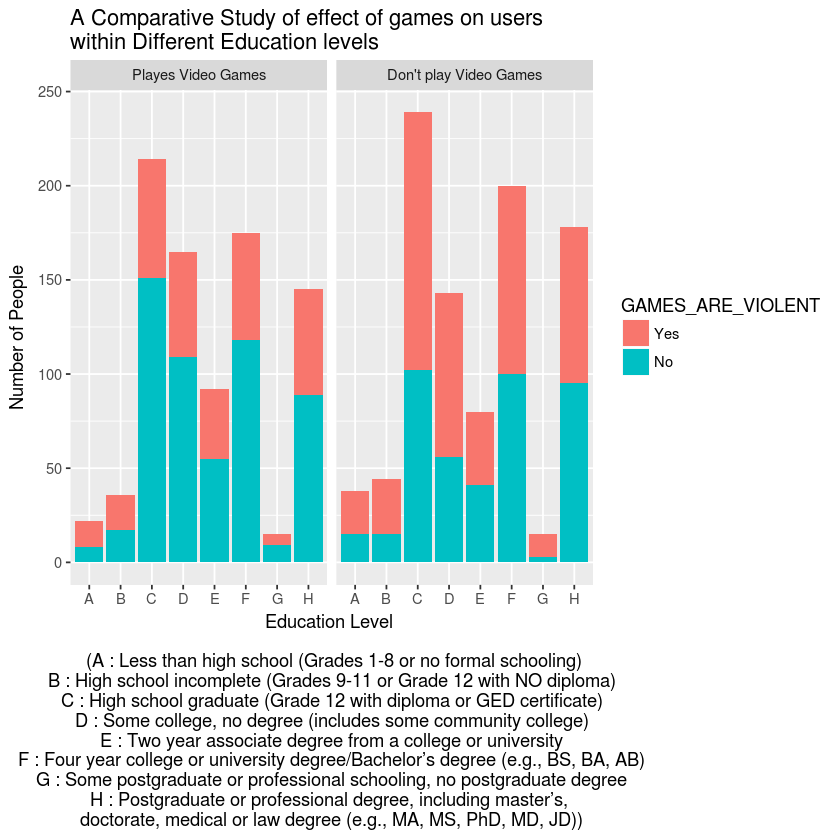

In [297]:
qplot(educ2, data = data3, geom = "bar", facets = .~ game1, fill = GAMES_ARE_VIOLENT, xlab = xLabel3, ylab = yLabel3, main = title3)

# HYPOTHESIS 3

** IRRESEPECTIVE OF THE EDUCATION LEVEL, PEOPLE WHO PLAYES VIDEO GAMES ARE AWARE THAT ITS NOT HARMFUL OR MAKE PEOPLE ACT VIOLENTLY. MARORITY OF THE NOTION IS FROM THOSE WHO DONT PLAY ANY VIDEO GAME **

# Qns 4) Is there any relationship between education level, income level level and how they think about their society ?

Check the data for community opinion if it needed any cleaning 

In [300]:
totalData %>% group_by(q1) %>% summarize(count = n())

q1,count
1,822
2,846
3,256
4,63
8,11
9,3


Define the filters and provide appropiate naming

In [301]:
data4 = totalData %>% filter(educ2 < 10) %>%
    filter(q1 < 8) %>%
    filter(inc < 10) %>%
    within(OPINION_ON_COMMUNITY <- factor(q1, levels = c(1,2,3,4), labels = c("Excellent","Good","Fair","Poor"))) %>% 
    within(educ2 <- factor(educ2, levels = c(1,2,3,4,5,6,7,8), labels = c("A","B","C","D","E","F","G","H"))) %>% 
    within(INCOME <- factor(inc, levels = c(1,2,3,4,5,6,7,8,9), labels = c("Less than $10,000","10 to under $20,000","20 to under $30,000","30 to under $40,000","40 to under $50,000","50 to under $75,000","75 to under $100,000","100 to under $150,000","$150,000 or more")))

Define the X axis label

In [302]:
xLabel4 = "Education Level \n\n (A : Less than high school (Grades 1-8 or no formal schooling)
B : High school incomplete (Grades 9-11 or Grade 12 with NO diploma)
C : High school graduate (Grade 12 with diploma or GED certificate)
D : Some college, no degree (includes some community college)
E : Two year associate degree from a college or university
F : Four year college or university degree/Bachelor’s degree (e.g., BS, BA, AB)
G : Some postgraduate or professional schooling, no postgraduate degree
H : Postgraduate or professional degree, including master’s, \ndoctorate, medical or law degree (e.g., MA, MS, PhD, MD, JD))"

Define the Y axis label

In [303]:
yLabel4 = "Number of People"

Define the title

In [304]:
title4 = "A Comparative Study of community rating within Different Education levels and \nIncome ranges"

Draw the plot

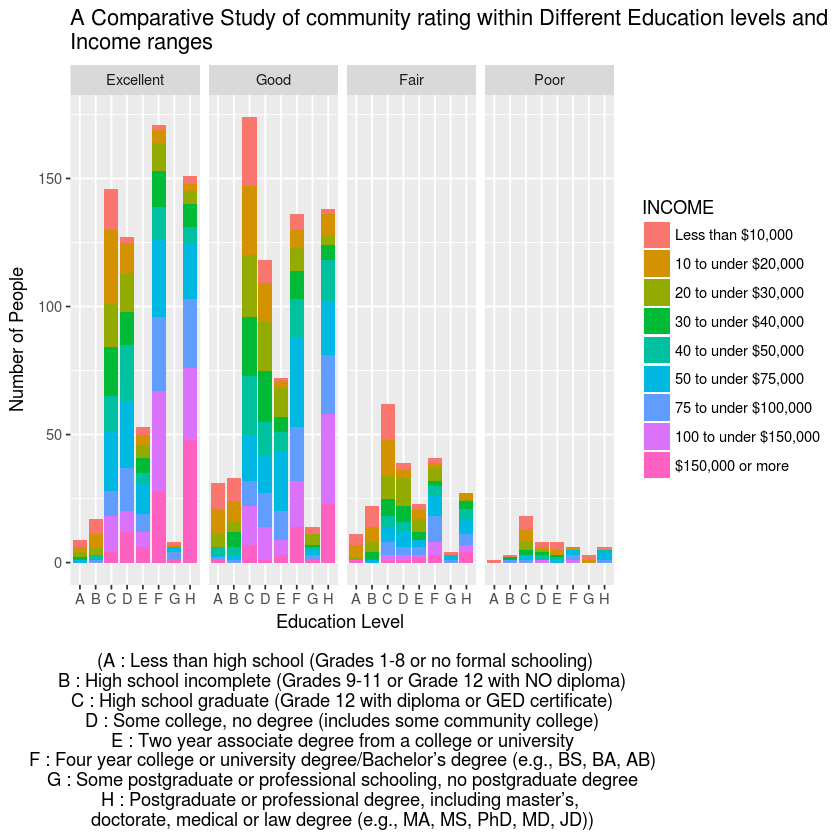

In [305]:
qplot(educ2, data = data4, geom = "bar", facets = .~ OPINION_ON_COMMUNITY, fill = INCOME, xlab = xLabel4, ylab = yLabel4, main = title4)

# HYPOTHESIS 4

**Happiness Quotient : Irrespective of salary and education level, people are happpy with the community they are living and work**

# Qns 5) With the advent high speed internet and SmartPhones, Cable TV usage will go down. Is this correct ? Or is this true in some section of people ?

Check the data for people who uses cable connection and if it needed any cleaning 

In [257]:
totalData %>% group_by(cable1) %>% summarize(count = n())

cable1,count
1,1578
2,418
8,5


Define the filters and provide appropiate names

In [309]:
data5 = totalData %>% filter(cable1 < 8) %>%
    filter(inc < 10) %>%
    within(sex <- factor(sex, levels = c(1,2), labels = c("Male", "Female"))) %>%
    within(WATCHES_CABLE_TV <- factor(cable1, levels = c(1,2), labels = c("Yes","No"))) %>% 
    within(INCOME <- factor(inc, levels = c(1,2,3,4,5,6,7,8,9), labels = c("A","B","C","D","E","F","G","H","I")))

Define the X axis label

In [310]:
xLabel5 = "Income range \n\n (A : Less than $10,000
B : 10 to under $20,000
C : 20 to under $30,000
C : 30 to under $40,000
D : 40 to under $50,000
E : 50 to under $75,000
F : 75 to under $100,000
G : 100 to under $150,000
H : $150,000 or more)"

Define the Y axis label

In [311]:
yLabel5 = "Number of People"

Define the title of the graph

In [312]:
title5 = "A Comparative Study of People who watches cable TV within Different \nIncome ranges"

Plot the data

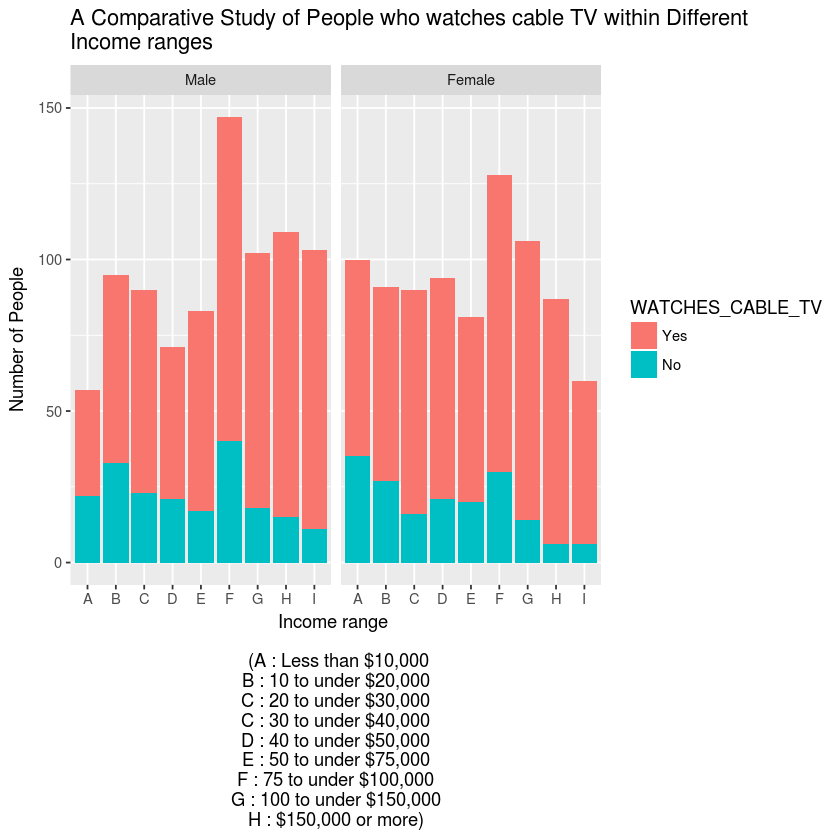

In [313]:
qplot(INCOME, data = data5, geom = "bar", facets = .~ sex, fill = WATCHES_CABLE_TV, xlab = xLabel5, ylab = yLabel5, main = title5)

# HYPOTHESIS 5

**Cable TV is still the major source of entertainment compared to internet among both the genders and various income range**

# References 

1. http://rstudio-pubs-static.s3.amazonaws.com/25402_590f6acfb2544355883f8dcf1c441dc6.html
2. https://cran.r-project.org/web/packages/dplyr/vignettes/databases.html